<a href="https://colab.research.google.com/github/rajeshmore1/Capstone-Project-4/blob/main/Rajesh_More_Team5_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
pip install modin


In [1]:
pip install modin[dask]

     |████████████████████████████████| 573kB 5.3MB/s 
     |████████████████████████████████| 645kB 6.9MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=09ec2b54382ac9e496feca1ee3d40bfe47c4fcfdde9d34c21dc88e843ea600a0
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [2]:
import modin.pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 1/Copy of data_driven_investment_1.csv'
df = pd.read_csv(working_dir_path)

# Hypothesis

1. Generally people spend more time on the app which they like the most. So the popularity of business or app is directly propotional to the average time spend on app.
2.  The people must have good engagement ratio on apps or companies which already got some kind of fund.As if we consider the start ups which already recieved funds are well researched by the angel investors. Already funded startups have more resources to invest on multiple features on app and can can provide greater user/client happiness score.
3.  Uninstall rate(Churn rate) suggest us that initially users are attracted by the promises made by the companies/start-ups, hence they downloaded the app but later they uninstalled it. The reason might be, inter-alia, startup did not able to stand on their expectations.
4. 

In [ ]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [ ]:
df.shape

(1502175, 20)

In [ ]:
duplicate = df[df.duplicated()] 
duplicate.head()
duplicate.shape

(89412, 20)

In [ ]:
df.describe()

,month,Avg_Session_Time,Founded Year,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
count,1.502175e+06,877732.000000,2414.000000,118087.000000,877715.000000,1.050875e+06,2.255000e+03,877665.000000,352269.000000,1.502175e+06
mean,2.019719e+07,1.623425,2014.761806,0.398434,3.940650,1.067470e-03,7.730093e+07,5.963737,0.144645,1.607003e-03
std,5.532865e+03,2.253530,3.970991,0.208612,4.537119,1.690396e-02,3.259730e+08,9.593691,0.130948,4.005523e-02
min,2.018070e+07,0.000033,1983.000000,0.000019,1.000000,0.000000e+00,6.200000e+01,0.000033,0.000000,0.000000e+00
25%,2.019120e+07,0.417683,2014.000000,0.235294,1.875000,3.022203e-07,2.014807e+06,1.085473,0.056641,0.000000e+00
50%,2.020030e+07,0.889808,2016.000000,0.388769,2.933333,5.137744e-06,8.151818e+06,2.726575,0.107383,0.000000e+00
75%,2.020040e+07,1.917317,2017.000000,0.546218,4.500000,7.543001e-05,3.700000e+07,6.613983,0.190829,0.000000e+00
max,2.020060e+07,58.561333,2020.000000,1.000000,80.000000,9.990408e-01,7.201430e+09,149.983317,1.000000,1.000000e+00


In [ ]:
df['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [ ]:
df['Uninstall_Rate'].min()

0.0

In [ ]:
df['Uninstall_Rate'].max()

1.0

In [ ]:
df['Uninstall_Rate'].value_counts()

0.000000    18909
0.200000     2442
0.125000     2434
0.250000     2194
0.142857     1903
            ...  
0.050370        1
0.370518        1
0.145763        1
0.060314        1
0.150709        1
Name: Uninstall_Rate, Length: 74284, dtype: int64

In [ ]:
df['Total_Session_Time'].min()

3.333333333333333e-05

In [ ]:
df['Total_Session_Time'].max()

149.98331666666667

In [ ]:
df['Total_Session_Time'].value_counts()	

0.034450     13
0.013100     13
0.010083     12
0.005000     12
0.008200     12
             ..
6.681837      1
3.712097      1
33.341490     1
3.513405      1
23.377093     1
Name: Total_Session_Time, Length: 815087, dtype: int64

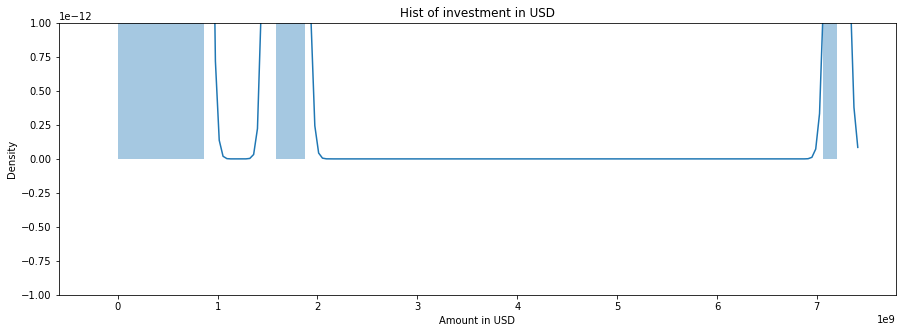

In [ ]:
#plt.figure(figsize=(8,5))
sns.distplot(df['Total Funding (USD)'])
plt.xlabel('Amount in USD')
plt.title("Hist of investment in USD")
plt.show()

In [ ]:
df['Total Funding (USD)'].isna().sum()

0          True
1          True
2          True
3          True
4          True
           ... 
1502170    True
1502171    True
1502172    True
1502173    True
1502174    True
Name: Total Funding (USD), Length: 1502175, dtype: bool

In [ ]:
# lets check the Maximum funding of a startup
print("Maximum funding to a Startups is : ", df["Total Funding (USD)"].dropna().sort_values().max())

Maximum funding to a Startups is :  7201429984.0


In [ ]:
#df["Total Funding (USD)"] = df["Total Funding (USD)"].apply(lambda x: float(str(x).replace(",","")))
print("Min Amount")
print(df["Total Funding (USD)"].min())
print("Mean Amount")
print(round(df["Total Funding (USD)"].mean(),2))
print("Median Amount")
print(df["Total Funding (USD)"].median())
print("Max Amount")
print(df["Total Funding (USD)"].max())
print("Standard Deviation Amount")
print(round(df["Total Funding (USD)"].std(),2))

Min Amount
62.0
Mean Amount
77300932.7
Median Amount
8151818.0
Max Amount
7201429984.0
Standard Deviation Amount
325972954.48


In [ ]:
# 3 start ups recieved highest funding. They worked in the areas like shopping,business and Social. All are based in Bangalore city and all are acquired by some other company.
df[df['Total Funding (USD)']==7201429984]


,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
586621,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Shopping,2.306675,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.725223,4.501723,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.422252,National,7.201430e+09,10.361766,0.023394,1
586622,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Business,0.788551,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.562418,9.968127,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001076,National,7.201430e+09,7.637852,0.108967,1
593461,cda9435bb7af9ee517fe018080d7f081a36c9397,20200601,Social,4.959111,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.517502,5.633894,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001452,National,7.201430e+09,27.556655,0.228422,1


In [ ]:
df['Total Funding (USD)'].value_counts()

2014807.0     232
35000000.0    124
305232.0      117
2065636.0     113
16000000.0    110
             ... 
680316.0        1
45123413.0      1
2800000.0       1
29769403.0      1
5152755.0       1
Name: Total Funding (USD), Length: 301, dtype: int64

In [ ]:
# lets check the startups with more than 50crore+ funding
# There are 1813 startups which recievs more than 1 million funding
#80 starts received more than 50 Cr USD or 50 million
onemillion = df[df['Total Funding (USD)'] > 1000000].sort_values(by ='Total Funding (USD)', ascending = False)
onemillion.shape

(1813, 20)

In [ ]:
# lets check the startups with more than 50crore+ funding

#80 starts received more than 50 Cr USD or 50 million
Fifty = df[df['Total Funding (USD)'] > 500000000].sort_values(by ='Total Funding (USD)', ascending = False)
Fifty.shape

(80, 20)

In [ ]:
# Average Funding is 77million dolloars
print("On Average indian startups got funding of : ", df["Total Funding (USD)"].dropna().sort_values().mean())

On Average indian startups got funding of :  77300932.69534369


In [ ]:
# It seems all startups are belong to the India only.
df['Region'].value_counts()

National    1502175
Name: Region, dtype: int64

In [ ]:
df['Reach'].unique()

array([0.04296326, 0.00324441, 0.00016134, ..., 0.00115337, 0.00079944,
       0.00349757])

In [ ]:
df['Practice Areas'].isna().sum()

1499761

In [ ]:
# There are 132 differen types of pracice areas in which startups are working. They are FinTech, Consumer, Media and Entertainment etc
df['Practice Areas'].value_counts()

FinTech                                    306
Consumer\nMedia & Entertainment\nEdTech    233
Media & Entertainment                      133
EdTech\nEdTech\nAccelerator Batches        120
Consumer                                   117
                                          ... 
HealthTech\nCovid-19\nConsumer               1
Technology                                   1
Consumer\nAuto Tech\nFinTech\nInsurTech      1
FinTech\nEdTech\nFinancial Services          1
Consumer\nEdTech                             1
Name: Practice Areas, Length: 132, dtype: int64

In [ ]:
df['Overview'].value_counts()

Q&A-based education community                                           232
Local news video streaming platform                                     121
Online marketplace for study material                                   117
Manufactures and supplies cold pressed juice for women's health         113
App-based online marketplace for video commerce                         107
                                                                       ... 
Online fantasy platform for multi-category sports                         1
AI based personal mobile assistant with support for Indian languages      1
Online marketplace for intercity freight transportation                   1
B2B platform to procure the food ingredients                              1
Blended online and offline courses for healthcare professionals           1
Name: Overview, Length: 323, dtype: int64

In [ ]:
df['Open_Rate'].value_counts()

1.000000     108832
2.000000      64190
3.000000      36290
4.000000      22059
5.000000      13532
              ...  
2.550039          1
13.959097         1
4.357553          1
1.940816          1
7.579942          1
Name: Open_Rate, Length: 172913, dtype: int64

In [ ]:
df['MAU'].value_counts()

0.500000    3556
0.333333    2690
0.250000    2181
0.200000    1529
0.400000    1470
            ... 
0.751445       1
0.112319       1
0.750929       1
0.311669       1
0.702465       1
Name: MAU, Length: 30516, dtype: int64

In [ ]:
df['Latest Funded Date'].value_counts()

2020-09-25    232
2020-05-27    224
2020-09-30    122
2020-01-18    116
2020-02-14    107
             ... 
2020-09-22      1
2019-12-13      1
2020-09-29      1
2019-12-12      1
2020-02-12      1
Name: Latest Funded Date, Length: 240, dtype: int64

In [ ]:
df['Latest Funded Date'].value_counts().sum()

2414

In [ ]:
df['Founded Year'].isna().sum()

1499761

In [ ]:
df['Founded Year'].value_counts()

2018.0    426
2016.0    412
2015.0    346
2014.0    306
2017.0    232
2019.0    160
2011.0    110
2013.0     91
2012.0     88
2000.0     69
2010.0     51
2009.0     51
2008.0     42
2020.0      8
2006.0      6
2007.0      6
1995.0      6
1984.0      2
2004.0      1
1983.0      1
Name: Founded Year, dtype: int64

In [ ]:
df['Feed Name'].value_counts()

Social Platforms\nTest Preparation Tech                                          233
OTT Video                                                                        124
K-12 EdTech\nTest Preparation Tech\nY Combinator Batches                         117
Food & Beverage Products                                                         113
Cryptocurrencies                                                                 107
                                                                                ... 
Horizontal E-Commerce\nInfluencer E-Commerce\nVideo Commerce\nSurge Batches        1
Pre-K EdTech\nExtreme Entrepreneurs Batches                                        1
Alternative Lending\nCrop Tech                                                     1
Mom & Baby Care\nPre-K EdTech                                                      1
Customer Service Software\nLocal Services\nInternet First Insurance Platforms      1
Name: Feed Name, Length: 180, dtype: int64

In [ ]:
df['Company Stage'].value_counts()

Seed        1116
Series A     344
Series B     339
Series C     277
Series D     158
Acquired      49
Series I      37
Series H      36
Series F      35
Series E      16
Funded         4
Series G       3
Name: Company Stage, dtype: int64

Seed        1116
Series A     344
Series B     339
Series C     277
Series D     158
Acquired      49
Series I      37
Series H      36
Series F      35
Series E      16
Funded         4
Series G       3
Name: Company Stage, dtype: int64


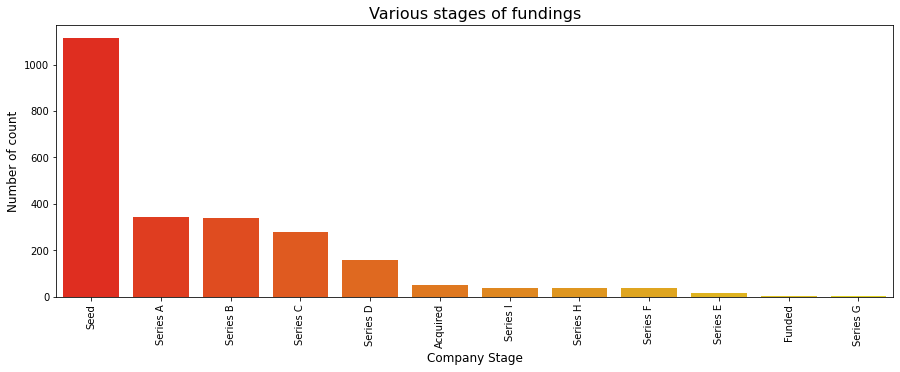

In [ ]:
# lets analyze the company stage

industry = df['Company Stage'].value_counts().head(15)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Company Stage', fontsize=12)
plt.ylabel('Number of count', fontsize=12)
plt.title("Various stages of fundings", fontsize=16)
plt.show()

In [ ]:
df['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2671
a8febb4b767f83022235f3f34a2241ed1e13db2f    1778
524889f05a60933210abde13d9db9211986698ac    1575
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1531
10a07f3aa16935a1b5a79c0d19bf5e4044cd5f21    1282
                                            ... 
505bd279be3bc56861dc2826f80b583949feab12       1
b5e13df44e7172d9b33fe8b711f73a034a2ae8eb       1
3912606f4476bb8b2bfcbec6e1ce98a636547b72       1
b8d14b0db8ff0e02b4622a95f38ddd285025662a       1
fde98aa41356dbc3166f8b51a80db4a81dcd6686       1
Name: UUID, Length: 147741, dtype: int64

In [ ]:
df['City'].value_counts()

Bangalore                   686
Gurgaon                     526
Delhi                       475
Mumbai                      356
Kingstown\nMumbai           107
Pune                         69
Noida                        35
Hyderabad                    31
Chennai                      21
San Mateo\nChennai           21
Ahmedabad                    16
Kolkata                       7
Jaipur                        7
Kota                          6
Dublin\nBangalore             6
Singapore\nGurgaon            5
Bhopal                        3
Bangalore\nMumbai             3
London                        3
Panaji                        3
Hangzhou\nDelhi               3
San Francisco\nBangalore      3
Singapore\nBangalore          3
Coimbatore                    3
Fremont\nMumbai               2
Kochi                         2
Chicago\nNoida                2
Kanpur                        1
Faridabad                     1
London\nNoida                 1
Name: City, dtype: int64

In [ ]:
df['Business Models'].value_counts()

Social Platforms > Interest Based > Education > Higher Education > Q&A Platforms\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced                                                                              232
OTT Video > OTT Streaming Platforms > Video On Demand (VOD) > News                                                                                                                                                                 124
K-12 EdTech > B2C Learning Solutions > School Curriculum > Multi Subject > Horizontal\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced\nY Combinator Batches > 2020 > Winter                                   117
Food & Beverage Products > Beverages > Juices and Dilutables > Juices > Cold-pressed                                                                                                                                               113
Influencer E-Commerce > Live Video\nVideo Commerce > Live Stream Commerce   

In [ ]:
df['Application Category'].value_counts()

Education                  202514
Tools                      139262
Business                    87780
Books & Reference           85189
Entertainment               76582
Productivity                63135
Personalization             62694
Finance                     60828
Photography                 56762
Music & Audio               55885
Lifestyle                   53462
Social                      38896
Communication               37143
Travel & Local              37100
Health & Fitness            36996
Shopping                    31776
Simulation                  29967
News & Magazines            27598
Casual                      25771
Action                      24972
Video Players & Editors     24309
Puzzle                      24304
Sports                      20217
Arcade                      18639
Medical                     17691
Educational                 14675
Food & Drink                14230
Maps & Navigation           14028
Racing                      13608
Adventure     

In [ ]:
df.isna().sum()

UUID                       1482
month                         0
Application Category          0
Avg_Session_Time         624443
Business Models         1499761
City                    1499768
Company Stage           1499761
Feed Name               1499761
Founded Year            1499761
Latest Funded Date      1499761
MAU                     1384088
Open_Rate                624460
Overview                1499761
Practice Areas          1499761
Reach                    451300
Region                        0
Total Funding (USD)     1499920
Total_Session_Time       624510
Uninstall_Rate          1149906
funding_ind                   0
dtype: int64

In [ ]:
# missing data 

# lets import warnings module
import warnings
warnings.filterwarnings('ignore')

# lets calculate the total missing values in the data
total = df.isnull().sum().sort_values(ascending = False)

# lets calculate the percentage of missing values in the data
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

# lets check the head of the data
missing_data

,Total,Percent %
Total Funding (USD),1499920,99.849884
City,1499768,99.839766
Latest Funded Date,1499761,99.839300
Business Models,1499761,99.839300
Practice Areas,1499761,99.839300
Overview,1499761,99.839300
Founded Year,1499761,99.839300
Feed Name,1499761,99.839300
Company Stage,1499761,99.839300
MAU,1384088,92.138932


Total startups funded :  147742
4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2671
a8febb4b767f83022235f3f34a2241ed1e13db2f    1778
524889f05a60933210abde13d9db9211986698ac    1575
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1531
10a07f3aa16935a1b5a79c0d19bf5e4044cd5f21    1282
03fb932e41ef68f1df45e0b20f326de05ebd438c    1235
ec1cd22193eda5ec91905247ea3079ae84e2dd30    1225
cdabedeb2908f470254d95b1b4a867cc5aae6901    1092
0105a0cd3abbfd352b68426dfe55025878511596    1033
0728093dd8e21467179ba6580d09737ef926ee49    1027
Name: UUID, dtype: int64


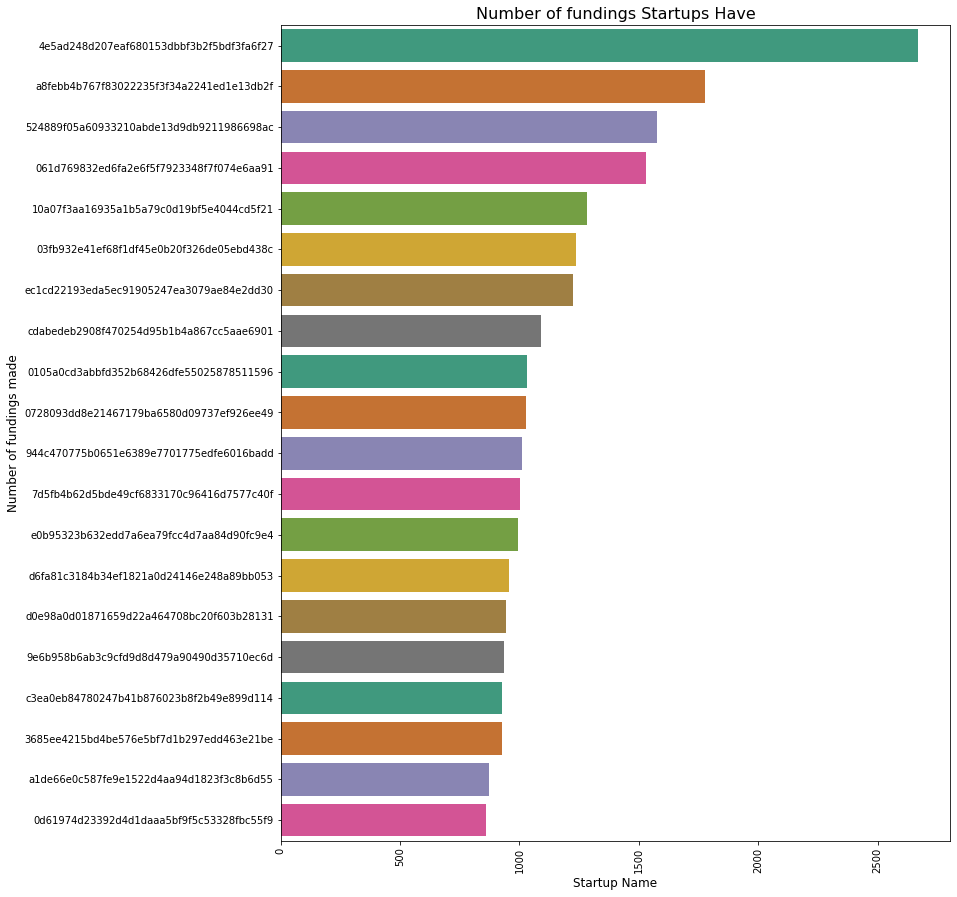

In [ ]:
# lets check the no. of funding each startsup got

print("Total startups funded : ", len(df["UUID"].unique()))
print(df["UUID"].value_counts().head(10))
startupname = df['UUID'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

Education            202514
Tools                139262
Business              87780
Books & Reference     85189
Entertainment         76582
Productivity          63135
Personalization       62694
Finance               60828
Photography           56762
Music & Audio         55885
Name: Application Category, dtype: int64


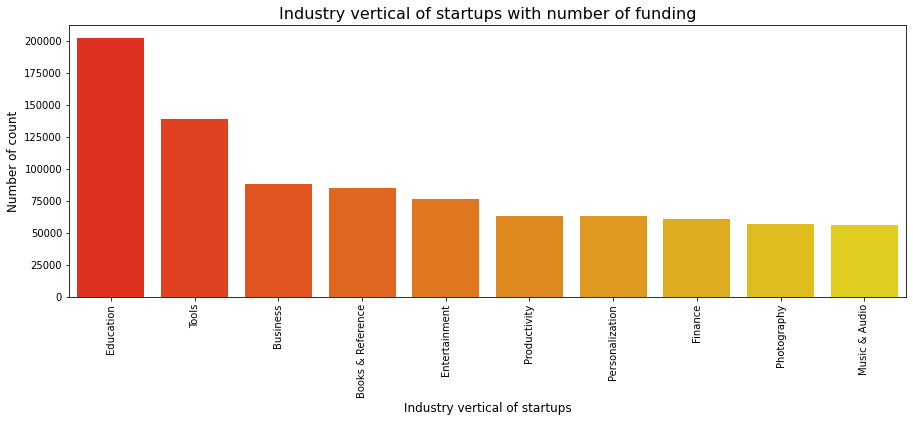

In [ ]:
# lets analyze the Industry of the Startups

# data cleaning
df['Application Category'] = df['Application Category'].replace('nan', 'Consumer Technology')

industry = df['Application Category'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of count', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

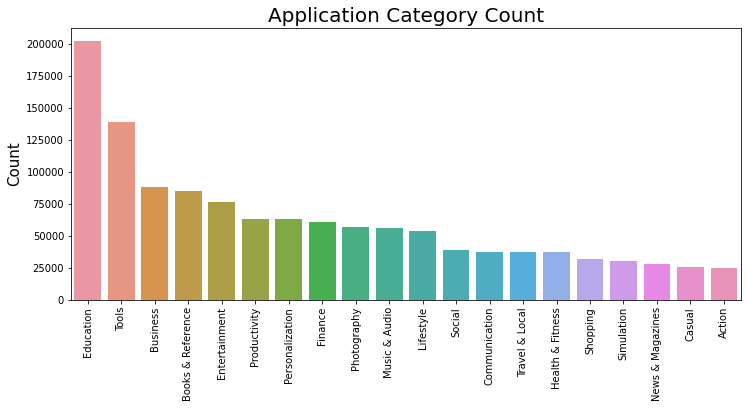

In [ ]:
cons_sub = df['Application Category'].value_counts()

plt.figure(figsize = (12,5))

g = sns.barplot(x=cons_sub.index[:20],y=cons_sub.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Application Category Count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()


FinTech                                    306
Consumer\nMedia & Entertainment\nEdTech    233
Media & Entertainment                      133
EdTech\nEdTech\nAccelerator Batches        120
Consumer                                   117
Food\nConsumer Goods                       113
Retail\nRetail                             110
FinTech\nInsurTech                          96
HealthTech                                  75
Enterprise Applications                     66
Name: Practice Areas, dtype: int64


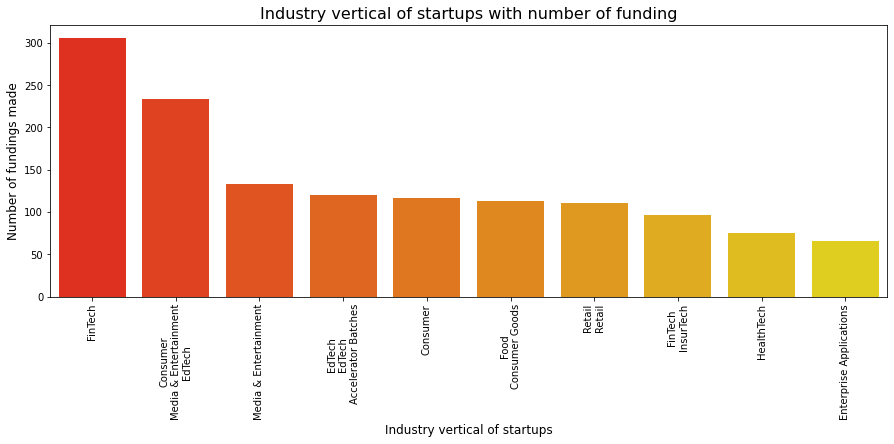

In [ ]:
# lets analyze the Industry of the Startups

# data cleaning
df['Practice Areas'] = df['Practice Areas'].replace('nan', 'Consumer Technology')

industry = df['Practice Areas'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Consumer\nAuto Tech\nFinTech\nInsurTech                                                                                                                                             1
Consumer\nEdTech\nEdTech                                                                                                                                                            1
EdTech\nAccelerator Batches                                                                                                                                                         1
Technology                                                                                                                                                                          1
Consumer\nEdTech                                                                                                                                                                    1
Retail\nCovid-19\nRetail\nRetail\nAccelerator Batches                                     

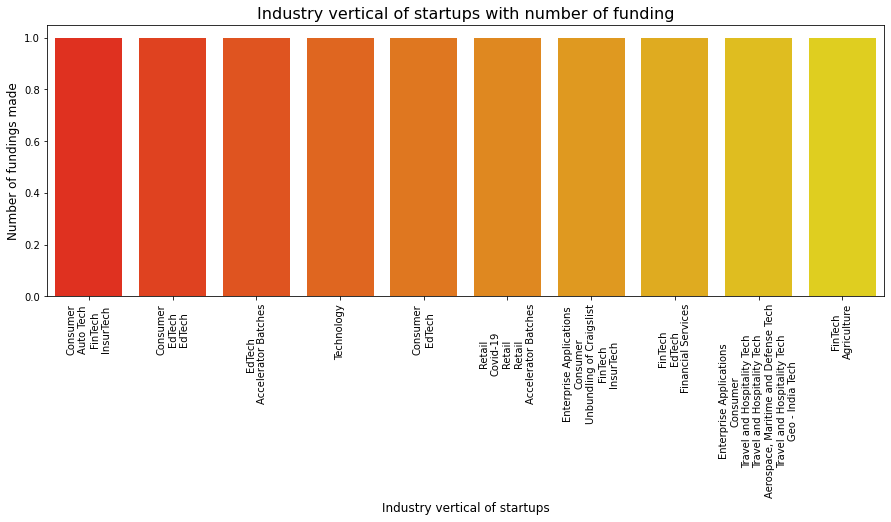

In [ ]:
# lets analyze the Industry of the Startups

# data cleaning
df['Practice Areas'] = df['Practice Areas'].replace('nan', 'Consumer Technology')

industry = df['Practice Areas'].value_counts().tail(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

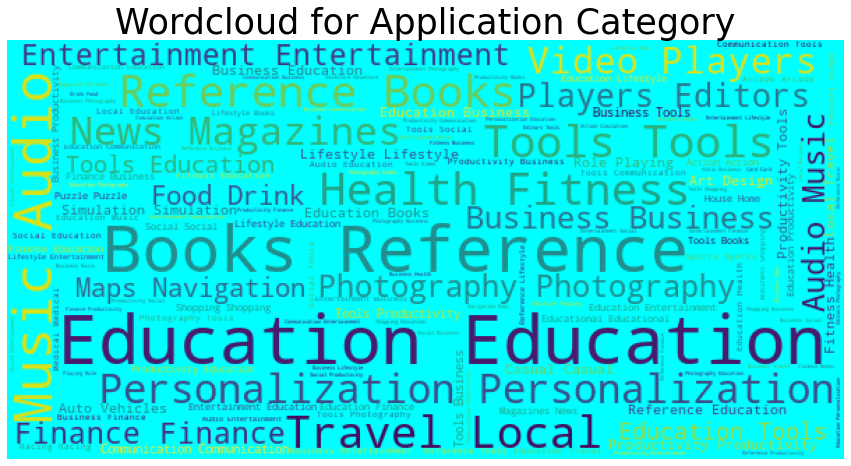

In [ ]:
from wordcloud import WordCloud

names = df["Application Category"][~pd.isnull(df["Application Category"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Application Category", fontsize=35)
plt.axis("off")
plt.show()

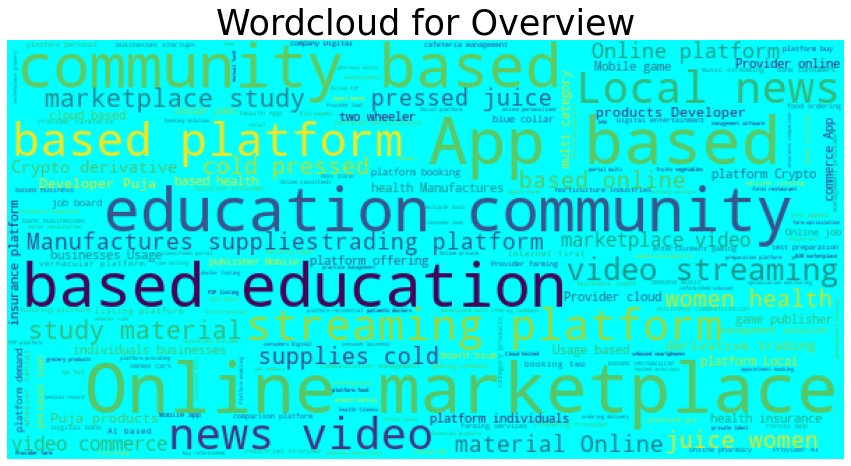

In [ ]:
from wordcloud import WordCloud

names = df["Overview"][~pd.isnull(df["Overview"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Overview", fontsize=35)
plt.axis("off")
plt.show()

Bangalore             686
Gurgaon               526
Delhi                 475
Mumbai                356
Kingstown\nMumbai     107
Pune                   69
Noida                  35
Hyderabad              31
San Mateo\nChennai     21
Chennai                21
Name: City, dtype: int64


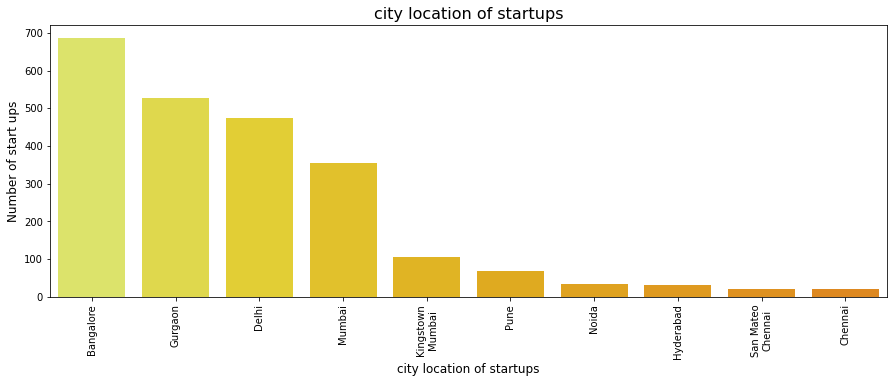

In [ ]:
# analyzing the effect of Cities on a Startup

# lets clean the data for better analysis
df['City'] = df['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = df['City'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of start ups', fontsize=12)
plt.title("city location of startups", fontsize=16)
plt.show()

In [ ]:
df.head(2)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0


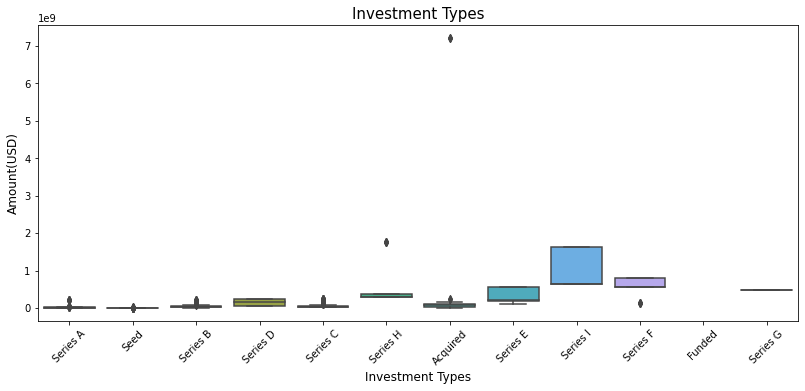

In [ ]:
plt.figure(figsize=(30,12))
g = sns.countplot(x="Company Stage", data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Investiment Type count", fontsize=15)
g.set_xlabel("investment Types", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(222)
g1 = sns.boxplot(x="Company Stage", y="Total Funding (USD)", 
            data=df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Investment Types", fontsize=15)
g1.set_xlabel("Investment Types", fontsize=12)
g1.set_ylabel("Amount(USD)", fontsize=12)

plt.show()

Description count of Location
Bangalore            686
Gurgaon              526
Delhi                475
Mumbai               356
Kingstown\nMumbai    107
Name: City, dtype: int64


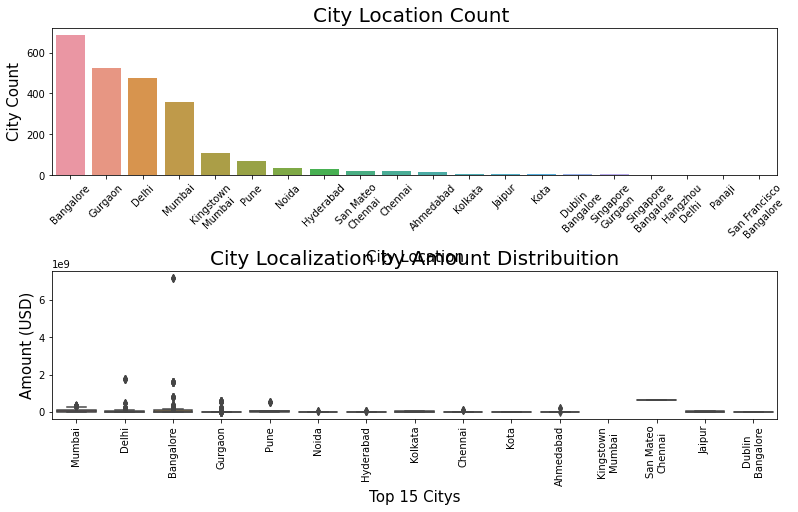

In [ ]:
location = df['City'].value_counts()
print("Description count of Location")
print(location[:5])

plt.figure(figsize=(13,7))

plt.subplot(211)
sns.barplot(x=location.index[:20], y=location.values[:20])
plt.xticks(rotation=45)
plt.xlabel('City Location', fontsize=15)
plt.ylabel('City Count', fontsize=15)
plt.title("City Location Count ", fontsize=20)

plt.subplot(212)
g = sns.boxplot(x='City', y="Total Funding (USD)",
                data=df[df.City.isin(location[:15].index.values)])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("City Localization by Amount Distribuition", fontsize=20)
g.set_xlabel("Top 15 Citys", fontsize=15)
g.set_ylabel("Amount (USD)", fontsize=15)

plt.subplots_adjust(hspace = 0.65,top = 0.9)

plt.show()

# We will explore why some companies got funds

In [ ]:
df2= df[df["funding_ind"]==1]

In [ ]:
df2.shape

(2414, 20)

In [ ]:
df2.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1


In [ ]:
# Startups in education sectors ar egetting more funds than any other
df2['Application Category'].value_counts()

Education                  511
Business                   245
Finance                    208
Music & Audio              170
Shopping                   130
Books & Reference          102
Travel & Local              90
Lifestyle                   88
Health & Fitness            83
Food & Drink                76
Tools                       68
Medical                     68
Simulation                  61
Productivity                49
Social                      48
Casual                      44
Entertainment               40
Auto & Vehicles             38
Sports                      31
Communication               31
Maps & Navigation           29
House & Home                27
News & Magazines            27
Weather                     26
Action                      25
Parenting                   16
Adventure                   14
Educational                 11
Personalization              9
Comics                       8
Board                        7
Racing                       6
Puzzle  

In [ ]:
df2['month'].value_counts()

20200601    524
20200301    234
20191201    230
20200401    226
20200201    201
20200101    196
20191101    153
20200501    142
20190501     65
20190601     57
20190401     57
20191001     46
20190701     33
20190901     32
20190801     30
20181201     29
20190301     29
20190101     27
20190201     26
20180701     20
20180801     18
20181101     16
20181001     13
20180901     10
dtype: int64

In [ ]:
df2.describe()

,month,Avg_Session_Time,Founded Year,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
count,2.414000e+03,1566.000000,2414.000000,408.000000,1566.000000,1.670000e+03,2.255000e+03,1566.000000,907.000000,2414.0
mean,2.019644e+07,1.797358,2014.761806,0.379086,4.139805,5.137201e-03,7.730093e+07,6.690352,0.155569,1.0
std,5.532184e+03,2.149001,3.970991,0.193255,5.423315,4.574567e-02,3.259730e+08,9.038201,0.116015,0.0
min,2.018070e+07,0.005533,1983.000000,0.003560,1.000000,1.972088e-07,6.200000e+01,0.005533,0.000000,1.0
25%,2.019110e+07,0.566662,2014.000000,0.234163,2.000000,4.889378e-06,2.014807e+06,1.546796,0.080340,1.0
50%,2.020020e+07,1.123146,2016.000000,0.375000,3.000000,6.166672e-05,8.151818e+06,3.949062,0.123967,1.0
75%,2.020050e+07,2.192495,2017.000000,0.514422,4.257185,4.062941e-04,3.700000e+07,8.047076,0.195261,1.0
max,2.020060e+07,25.612834,2020.000000,1.000000,69.621798,9.954680e-01,7.201430e+09,79.162116,1.000000,1.0


In [ ]:
# The value of mean is more than median suggest than that means distribution is positively skewd.(1.79>1.12)
print(df2["Avg_Session_Time"].median())


1.1231464669237161


In [ ]:
df3= df[df["Avg_Session_Time"]>=1.79735]

In [ ]:
df3.shape

(234648, 20)

In [ ]:
df3.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
29182,0a59d138b3eaccd22b665eae70c756fef83ddb63,20191201,Finance,2.742948,NaN,NaN,NaN,NaN,NaN,NaN,0.111111,1.914286,NaN,NaN,0.000082,National,NaN,7.232086,0.108911,0
29186,7dd8f8918e91940bb6f8af0b4889fedaf421d0db,20191201,Education,2.395400,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,1.000000,NaN,NaN,0.000158,National,NaN,2.395400,0.089744,0
29191,65a3985f1f08572b6a79b93f8e88b494d3ab95cb,20191201,Health & Fitness,3.748540,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.256522,NaN,NaN,0.000097,National,NaN,6.348504,0.091954,0
29192,f745a26ffa0134312bef4745df6c127192aea6b2,20191201,Education,2.416249,NaN,NaN,NaN,NaN,NaN,NaN,0.394089,4.316367,NaN,NaN,0.001277,National,NaN,10.606860,0.071811,0
29198,5b155c479a0b92bd1e35a754ceb2b3dc9f5348c9,20191201,Education,1.907444,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,2.150407,NaN,NaN,0.000180,National,NaN,3.071519,0.018349,0


In [ ]:
print(df2["Total_Session_Time"].median())

3.949061614782949


In [ ]:
df3= df2[df2["Total_Session_Time"]>=3.94]

In [ ]:
df3.shape

(786, 20)

In [ ]:
print(df2["Open_Rate"].median())

3.0


In [ ]:
df3= df2[df2["Open_Rate"]>=3]

In [ ]:
df3.shape

(787, 20)

In [ ]:
df3.head(20)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
30116,be6e10359783dbb348336cec3d484de299e6dbf2,20191201,Maps & Navigation,0.730469,Road Transport Tech > Self Drive Rentals > Mot...,Bangalore,Series C,Road Transport Tech\nOnline Rental,2016.0,2020-02-22,0.394872,7.858254,App-based scooter rental service,Consumer\nAuto Tech\nTravel and Hospitality Te...,0.007091,National,153503614.0,6.041805,0.102469,1
30713,5502efb97f6f567ce26524fe9e9406b4fe2c75df,20191201,Business,1.231429,Remittance > Internet First Platforms > P2P Re...,Gurgaon,Series A,Remittance\nForex Tech,2011.0,2020-03-02,0.266667,3.556962,Online Money Exchange and Remittances,FinTech\nFinTech,0.000110,National,5588693.0,4.795270,0.146552,1
30758,26c4ef6a1036eaf82f937cba0efe35716c8aa2b3,20191201,Lifestyle,1.162330,Residential Real Estate Tech > Listings > P2P\...,Bangalore,Series D,Residential Real Estate Tech\nCommercial Real ...,2014.0,2020-03-30,0.642857,7.243102,Online P2P listing platform for residential an...,Consumer\nReal Estate and Construction Tech\nR...,0.000178,National,152768959.0,9.129820,0.070796,1
30858,31afa7f2cb57233d8e257037bbb5adc818601b3e,20191201,Education,2.433409,Food & Beverage Products > Beverages > Juices ...,Bangalore,Seed,Food & Beverage Products,2017.0,2020-01-18,0.489362,3.472447,Manufactures and supplies cold pressed juice f...,Food\nConsumer Goods,0.000158,National,2065636.0,8.797258,0.078313,1
32898,739a3b67964de700b7735d56498808715a23d66d,20191201,Health & Fitness,1.093741,Local Services > Personal Wellness Services > ...,Mumbai,Series A,Local Services\nFitness & Wellness Tech,2013.0,2020-03-20,0.409836,3.654015,"Web portal for gym booking, fitness related ar...",Consumer\nUnbundling of Craigslist\nHealthTech,0.000403,National,10422240.0,4.151475,0.094183,1
34203,3ea64df33371e3a0fd1e81cd645d753aeaf74a63,20191201,Business,1.026569,Sales Force Automation > Productivity Tools > ...,San Francisco\nBangalore,Series B,Sales Force Automation\nField Force Automation...,2013.0,2020-03-11,0.831169,17.338609,Provides virtual assistant for sales represent...,Enterprise Applications\nEnterprise Applicatio...,0.000462,National,23000000.0,17.134182,0.060041,1
34320,3d4cfa4d271ef998628bf3f4d04ba1057288b307,20191201,Business,0.955132,Internet First Insurance Platforms > Internet ...,Bangalore,Series B,Internet First Insurance Platforms,2016.0,2020-02-18,0.347826,5.166172,Internet first insurance platform,FinTech\nInsurTech,0.000149,National,224350026.0,4.134677,0.167832,1
34845,d653191b5a0443c9d3745478c019dabde98626e9,20191201,Social,1.521232,Digital Publishing Platforms > Storytelling Pl...,Mumbai,Seed,Digital Publishing Platforms,2015.0,2020-01-11,0.380165,16.462566,Storytelling platform based on the poetry genre,Media & Entertainment,0.000433,National,4402250.0,23.198978,0.151335,1
36329,7e5dcf23deddb25c1a2a309c98a07b863b892bad,20191201,Education,3.121547,Test Preparation Tech > Digital Learning > Und...,Delhi,Series A,Test Preparation Tech,2016.0,2020-02-05,0.263158,4.116402,Online courses for NEET medical exam preparation,EdTech,0.000132,National,491317.0,7.414941,0.092199,1
36438,5e5476752db871a4a3d34c2f24946e172460ccc7,20191201,Finance,1.258208,Alternative Lending > Lead Generation Platform...,Mumbai,Seed,Alternative Lending,2015.0,2020-01-20,0.875000,4.619492,Loan comparison platform,FinTech,0.000088,National,1291661.0,5.495641,0.462963,1


In [ ]:
df4= df3[df3["funding_ind"]==1]

In [ ]:
df4.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
30116,be6e10359783dbb348336cec3d484de299e6dbf2,20191201,Maps & Navigation,0.730469,Road Transport Tech > Self Drive Rentals > Mot...,Bangalore,Series C,Road Transport Tech\nOnline Rental,2016.0,2020-02-22,0.394872,7.858254,App-based scooter rental service,Consumer\nAuto Tech\nTravel and Hospitality Te...,0.007091,National,153503614.0,6.041805,0.102469,1
30713,5502efb97f6f567ce26524fe9e9406b4fe2c75df,20191201,Business,1.231429,Remittance > Internet First Platforms > P2P Re...,Gurgaon,Series A,Remittance\nForex Tech,2011.0,2020-03-02,0.266667,3.556962,Online Money Exchange and Remittances,FinTech\nFinTech,0.000110,National,5588693.0,4.795270,0.146552,1
30758,26c4ef6a1036eaf82f937cba0efe35716c8aa2b3,20191201,Lifestyle,1.162330,Residential Real Estate Tech > Listings > P2P\...,Bangalore,Series D,Residential Real Estate Tech\nCommercial Real ...,2014.0,2020-03-30,0.642857,7.243102,Online P2P listing platform for residential an...,Consumer\nReal Estate and Construction Tech\nR...,0.000178,National,152768959.0,9.129820,0.070796,1
30858,31afa7f2cb57233d8e257037bbb5adc818601b3e,20191201,Education,2.433409,Food & Beverage Products > Beverages > Juices ...,Bangalore,Seed,Food & Beverage Products,2017.0,2020-01-18,0.489362,3.472447,Manufactures and supplies cold pressed juice f...,Food\nConsumer Goods,0.000158,National,2065636.0,8.797258,0.078313,1
32898,739a3b67964de700b7735d56498808715a23d66d,20191201,Health & Fitness,1.093741,Local Services > Personal Wellness Services > ...,Mumbai,Series A,Local Services\nFitness & Wellness Tech,2013.0,2020-03-20,0.409836,3.654015,"Web portal for gym booking, fitness related ar...",Consumer\nUnbundling of Craigslist\nHealthTech,0.000403,National,10422240.0,4.151475,0.094183,1


In [ ]:
df4.shape

(787, 20)

In [ ]:
df4['funding_ind'].value_counts()

1    787
dtype: int64

In [ ]:
working_dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 6/Copy of Final_prepared'
Prepared_data = pd.read_csv(working_dir_path)

In [ ]:
Prepared_data.head()

,Year,Month,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded
0,2020,3,0.054062,1.297619,0.000297,0.102915,0
1,2020,2,0.251853,1.038462,0.000326,0.369331,0
2,2020,6,0.123502,1.142857,0.000057,0.155060,0
3,2020,1,0.975511,4.991454,0.000339,4.925617,0
4,2020,5,0.191377,1.047619,0.000274,0.196478,0


In [ ]:
X = Prepared_data.drop('Funded', axis = 1)
y = Prepared_data['Funded']

In [22]:

from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [ ]:
 from sklearn.linear_model import SGDClassifier
 from sklearn.metrics import classification_report

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9978521018717398
Validation accuracy Score :  0.9979916317991632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11950
           1       0.00      0.00      0.00         0

    accuracy                           1.00     11950
   macro avg       0.50      0.50      0.50     11950
weighted avg       1.00      1.00      1.00     11950



In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
final_df_scaled = pd.DataFrame(mms.fit_transform(Prepared_data.drop('Funded',axis=1).values),columns=Prepared_data.drop('Funded',axis=1).columns)

In [ ]:
final_df_scaled.describe()

,Year,Month,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3
count,47799.00000,47799.000000,47799.000000,47799.000000,47799.000000,47799.000000
mean,0.77214,0.413613,0.036215,0.051517,0.003273,0.039735
std,0.32080,0.312611,0.029589,0.061154,0.019623,0.048178
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.50000,0.181818,0.023075,0.021470,0.000362,0.016875
50%,1.00000,0.363636,0.035239,0.046321,0.000972,0.036120
75%,1.00000,0.636364,0.037708,0.054202,0.002700,0.040660
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
final_df_scaled['y'] = Prepared_data['Funded']
final_df_scaled =final_df_scaled[~final_df_scaled.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(final_df_scaled.drop(['y'],axis=1).values,final_df_scaled['y'].values)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.8344776979925572
Validation accuracy Score :  0.829874213836478
              precision    recall  f1-score   support

           0       0.66      1.00      0.80      6309
           1       1.00      0.75      0.85     12771

    accuracy                           0.83     19080
   macro avg       0.83      0.87      0.82     19080
weighted avg       0.89      0.83      0.83     19080



In [ ]:
from sklearn.metrics import *
# function to find the metrics for classifiers
def find_metrics(model_name,model,X_train,X_test,y_train,y_test):
  models = {'model': [],'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1_score': [],
            'train_tn fp fn tp': [], 'train_auc_roc': [], 'test_accuracy': [], 'test_precision': [],
            'test_recall': [], 'test_f1_score': [], 'test_tn fp fn tp': [], 'test_auc_roc': []}
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  models['train_accuracy'].append(accuracy_score(y_train,y_pred_train))
  models['train_precision'].append(precision_score(y_train,y_pred_train))
  models['train_recall'].append(recall_score(y_train,y_pred_train))
  models['train_f1_score'].append(f1_score(y_train,y_pred_train))
  models['train_tn fp fn tp'].append(confusion_matrix(y_train,y_pred_train).flatten())
  models['train_auc_roc'].append(roc_auc_score(y_train,y_pred_train))
  models['test_accuracy'].append(accuracy_score(y_test,y_pred_test))
  models['test_precision'].append(precision_score(y_test,y_pred_test))
  models['test_recall'].append(recall_score(y_test,y_pred_test))
  models['test_f1_score'].append(f1_score(y_test,y_pred_test))
  models['test_tn fp fn tp'].append(confusion_matrix(y_test,y_pred_test).flatten())
  models['test_auc_roc'].append(roc_auc_score(y_test,y_pred_test))
  models['model'].append(model_name)
  return pd.DataFrame(models)

In [ ]:
find_metrics("SGD",sgd_clf,X_train,X_test,y_train,y_test)

,model,train_accuracy,train_precision,train_recall,train_f1_score,train_tn fp fn tp,train_auc_roc,test_accuracy,test_precision,test_recall,test_f1_score,test_tn fp fn tp,test_auc_roc
0,SGD,0.834478,0.751363,1.0,0.858032,"[25511, 12632, 0, 38173]",0.834413,0.829874,0.74583,1.0,0.854413,"[6309, 3246, 0, 9525]",0.830141


# Final Prepared data

In [4]:
working_dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 6/Copy of Copy of Latest_Final_df.csv'
finaldf = pd.read_csv(working_dir_path)

In [5]:
finaldf.head()

,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
0,Social,0,0.696084,1.129897,0.000193,2.260626,0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0
1,Medical,0,0.566857,1.245098,0.000141,1.474566,0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0
2,Entertainment,0,0.701096,2.788406,0.001244,3.035878,0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0
3,Music & Audio,0,1.156437,5.199642,0.001015,5.945193,0,-0.081981,-0.009780,-0.210673,-0.092419,-2.187268,-0.759350,-0.002365,-0.001100,-2.762546e-03,0.317650,-1.932151,-1.150282,0.0,73.170732,21.0
4,Tools,0,0.561742,5.279142,0.001634,2.835840,0,0.125983,0.564501,0.650406,-0.116786,2.551803,-2.976204,-0.000073,0.001201,-1.659055e-03,0.466265,5.152284,0.261623,0.0,114.634146,5.0


In [8]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
finaldf['Application Category']= label_encoder.fit_transform(finaldf['Application Category']) 
  
finaldf['Application Category'].unique() 

array([33, 21, 14, 22, 36, 39, 26, 16, 11,  6, 12, 20,  7, 27,  9, 15, 28,
       38, 25, 31, 34, 40, 19, 17,  3, 32,  2, 23,  1,  4,  0, 10, 37, 13,
       18,  5, 30,  8, 35, 29, 24])

In [9]:
finaldf.head()

,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
0,33,0,0.696084,1.129897,0.000193,2.260626,0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0
1,21,0,0.566857,1.245098,0.000141,1.474566,0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0
2,14,0,0.701096,2.788406,0.001244,3.035878,0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0
3,22,0,1.156437,5.199642,0.001015,5.945193,0,-0.081981,-0.009780,-0.210673,-0.092419,-2.187268,-0.759350,-0.002365,-0.001100,-2.762546e-03,0.317650,-1.932151,-1.150282,0.0,73.170732,21.0
4,36,0,0.561742,5.279142,0.001634,2.835840,0,0.125983,0.564501,0.650406,-0.116786,2.551803,-2.976204,-0.000073,0.001201,-1.659055e-03,0.466265,5.152284,0.261623,0.0,114.634146,5.0


In [11]:
finaldf.funding_ind.value_counts()

0    111852
1       579
dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
final_df_scaled = pd.DataFrame(mms.fit_transform(finaldf.drop('funding_ind',axis=1).values),columns=finaldf.drop('funding_ind',axis=1).columns)

In [15]:
final_df_scaled.describe()

,Application Category,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
count,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000,112431.000000
mean,0.505456,0.031270,0.036964,0.000714,0.030092,0.001966,0.463951,0.455125,0.477908,0.495438,0.483212,0.483212,0.508778,0.319673,0.512841,0.298886,0.477733,0.445920,0.475466,0.002938,0.324260,0.219484
std,0.275726,0.037886,0.035856,0.007498,0.041480,0.044292,0.021118,0.018478,0.021683,0.020840,0.017955,0.017955,0.020552,0.004236,0.005631,0.004693,0.023874,0.020442,0.024202,0.050458,0.297210,0.264708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.009525,0.017076,0.000038,0.007547,0.000000,0.459328,0.451601,0.474165,0.490033,0.479256,0.479256,0.505014,0.319590,0.512760,0.298839,0.473626,0.442786,0.471943,0.000000,0.097701,0.047619
50%,0.475000,0.020335,0.030574,0.000191,0.017918,0.000000,0.466382,0.456827,0.478726,0.496877,0.484109,0.484109,0.509070,0.319659,0.512836,0.298870,0.480700,0.447942,0.476436,0.000000,0.264368,0.142857
75%,0.775000,0.037542,0.047714,0.000672,0.034774,0.000000,0.470562,0.459541,0.480591,0.502279,0.487623,0.487623,0.511504,0.319665,0.512843,0.298871,0.484423,0.450289,0.478030,0.000000,0.419540,0.238095
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
final_df_scaled['y'] = finaldf['Funded']
final_df_scaled =final_df_scaled[~final_df_scaled.isin([np.nan, np.inf, -np.inf]).any(1)]

In [18]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(final_df_scaled.drop(['y'],axis=1).values,final_df_scaled['y'].values)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  1.0
Validation accuracy Score :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22346
           1       1.00      1.00      1.00     22538

    accuracy                           1.00     44884
   macro avg       1.00      1.00      1.00     44884
weighted avg       1.00      1.00      1.00     44884



In [24]:
from sklearn.metrics import *
# function to find the metrics for classifiers
def find_metrics(model_name,model,X_train,X_test,y_train,y_test):
  models = {'model': [],'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1_score': [],
            'train_tn fp fn tp': [], 'train_auc_roc': [], 'test_accuracy': [], 'test_precision': [],
            'test_recall': [], 'test_f1_score': [], 'test_tn fp fn tp': [], 'test_auc_roc': []}
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  models['train_accuracy'].append(accuracy_score(y_train,y_pred_train))
  models['train_precision'].append(precision_score(y_train,y_pred_train))
  models['train_recall'].append(recall_score(y_train,y_pred_train))
  models['train_f1_score'].append(f1_score(y_train,y_pred_train))
  models['train_tn fp fn tp'].append(confusion_matrix(y_train,y_pred_train).flatten())
  models['train_auc_roc'].append(roc_auc_score(y_train,y_pred_train))
  models['test_accuracy'].append(accuracy_score(y_test,y_pred_test))
  models['test_precision'].append(precision_score(y_test,y_pred_test))
  models['test_recall'].append(recall_score(y_test,y_pred_test))
  models['test_f1_score'].append(f1_score(y_test,y_pred_test))
  models['test_tn fp fn tp'].append(confusion_matrix(y_test,y_pred_test).flatten())
  models['test_auc_roc'].append(roc_auc_score(y_test,y_pred_test))
  models['model'].append(model_name)
  return pd.DataFrame(models)

In [25]:
find_metrics("SGD",sgd_clf,X_train,X_test,y_train,y_test)

,model,train_accuracy,train_precision,train_recall,train_f1_score,train_tn fp fn tp,train_auc_roc,test_accuracy,test_precision,test_recall,test_f1_score,test_tn fp fn tp,test_auc_roc
0,SGD,1.0,1.0,1.0,1.0,"[89864, 0, 0, 89672]",1.0,1.0,1.0,1.0,1.0,"[22346, 0, 0, 22538]",1.0
